In [88]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

import torchvision
import torchvision.transforms as transforms

from collections import namedtuple
from itertools import product

from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt


In [98]:
torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

data_train = np.load('train_data.pkl', allow_pickle=True)
print("data_train")
print(data_train.shape)
nd_arr = np.array(data_train[0])
print(nd_arr.shape)

labels = np.load('finalLabelsTrain.npy', allow_pickle=False)
print(labels.shape)
print(labels[100])

data_train
(6400,)
(50, 49)
(6400,)
3.0


In [66]:
# print(data_train[0])

In [5]:
nd_arr.shape

(50, 49)

In [6]:
print(type(data_train[0]))

<class 'list'>


In [27]:
img = np.array([np.array(im) for im in data_train])

In [29]:
print(img.shape)

(6400,)


In [34]:
img[0].shape

(50, 49)

In [33]:
img[1].shape

(50, 47)

In [96]:
from skimage.transform import resize
train_data = np.array([np.expand_dims(resize(np.array(x), (50, 50)), axis=0) for x in data_train])
print(train_data.shape)
tensor_x = torch.stack([torch.Tensor(i) for i in train_data])
print(tensor_x.shape)
print(tensor_x[0])

#labels = np.expand_dims(labels, axis=1)
print(labels.shape)
tensor_y = torch.Tensor(labels)
print(tensor_y.shape)
print(tensor_y[0])

(6400, 1, 50, 50)
torch.Size([6400, 1, 50, 50])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([100])
torch.Size([100])
tensor(1.)


In [89]:
my_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y)

In [90]:
data_loader = torch.utils.data.DataLoader(
        my_dataset, batch_size=100, num_workers=1
    )

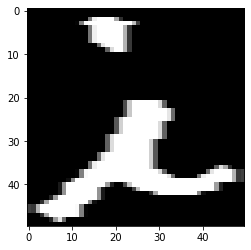

In [99]:
images, labels = next(iter(data_loader))

first_image = images[50]
first_image = np.array(first_image, dtype="float")
pixels = first_image.reshape((50, 50))
plt.imshow(pixels, cmap="gray")
plt.show()

In [69]:
import torch
import numpy as np
import torch.utils.data as utils

my_x = [np.array([[1.0,2],[3,4]]),np.array([[5.,6],[7,8]])] # a list of numpy arrays
my_y = [np.array([4.]), np.array([2.])] # another list of numpy arrays (targets)

tensor_x = torch.stack([torch.Tensor(i) for i in my_x]) # transform to torch tensors
tensor_y = torch.stack([torch.Tensor(i) for i in my_y])

my_dataset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = utils.DataLoader(my_dataset) # create your dataloader
print(tensor_y.shape)

torch.Size([2, 1])


In [42]:
np.array(my_x).shape

(2, 2, 2)

In [65]:
np.array(my_y).shape

(2, 1)

In [67]:
print(labels.shape)

(6400,)


In [71]:
data_loader = torch.utils.data.DataLoader(
        test_set, batch_size=batch_size, num_workers=1
    )

[[[1.]]

 [[1.]]

 [[1.]]

 ...

 [[8.]]

 [[8.]]

 [[8.]]]
